In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# load the training dataset

df = pd.read_csv(r"C:\Users\olayi\Downloads\Projects\Amazon_review. Assessment\archive (1)\train.csv", header=None)

# duplicate the data frame
review_df = df.copy()


# Concatenate columns 1 and 2 into a single column
review_df["Review"] = review_df[1] + " " + review_df[2]

# Drop columns 1 and 2
review_df.drop(columns=[1, 2], inplace=True)

# rename columns
review_df.columns = ['Sentiments', 'Reviews']
review_df

,Sentiments,Reviews
0,2,Stuning even for the non-gamer This sound trac...
1,2,The best soundtrack ever to anything. I'm read...
2,2,Amazing! This soundtrack is my favorite music ...
3,2,Excellent Soundtrack I truly like this soundtr...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3599995,1,Don't do it!! The high chair looks great when ...
3599996,1,"Looks nice, low functionality I have used this..."
3599997,1,"compact, but hard to clean We have a small hou..."
3599998,1,what is it saying? not sure what this book is ...


I combined the two text columns in the dataset to create a comprehensive review text. his was done with the aim of having a consolidated and complete review, and to enhance the clarity and completeness of the analysis. This is why I utilized the code above to merge the columns and subsequently dropped the original columns to streamline the dataset.


In [3]:
# Understanding the data
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Sentiments  int64 
 1   Reviews     object
dtypes: int64(1), object(1)
memory usage: 54.9+ MB


In [4]:
# Checking the shape of the dataset
review_df.shape

# There are 3.5million plus rows in this dataframe and 2 columns

(3600000, 2)

In [5]:
# I had to create a sample of the whole data set of run time and memory capacity
# Sample 100,000 rows randomly from the dataset
review_df = review_df.sample(n=100000, random_state=42)

# to reset the index of the sampled DataFrame
review_df.reset_index(drop=True, inplace=True)

In [6]:
# checking the datafram column with the reviews
review_df['Reviews']

0        Expensive Junk This product consists of a piec...
1        Toast too dark Even on the lowest setting, the...
2        Excellent imagery...dumbed down story I enjoye...
3        Are we pretending everyone is married? The aut...
4        Not worth your time Might as well just use a k...
                               ...                        
99995    A Good Intro book but not a GREAT one! Well, I...
99996    Not pleased. The Firm Lower body sculpt DVD di...
99997    Son loves these! I buy these for my 8 yr. old ...
99998    Terribad Firstly I have a 2009 Dodge Dakota, s...
99999    Sized wrong I ordered two Kid's Long Sleeve Ro...
Name: Reviews, Length: 100000, dtype: object

In [7]:
# Checking for missing values 
print(review_df.isnull().sum())

    


Sentiments    0
Reviews       0
dtype: int64


The reviews column has 17 missing values. To fix this, I removed the reviews with missing values

In [8]:
# Fix missing values
review_df = review_df.dropna(subset = 'Reviews')

In [9]:
# Confirm if missing values has been fixed
print(review_df.isnull().sum())

Sentiments    0
Reviews       0
dtype: int64


### Task 1: Sentiment Analysis

In [10]:
# Explore sentiment distribution
review_df['Sentiments'].value_counts()


1    50013
2    49987
Name: Sentiments, dtype: int64

Above results shows a balanced dataset with class 1 being the negative sentiments and class 2 being the positive sentiment

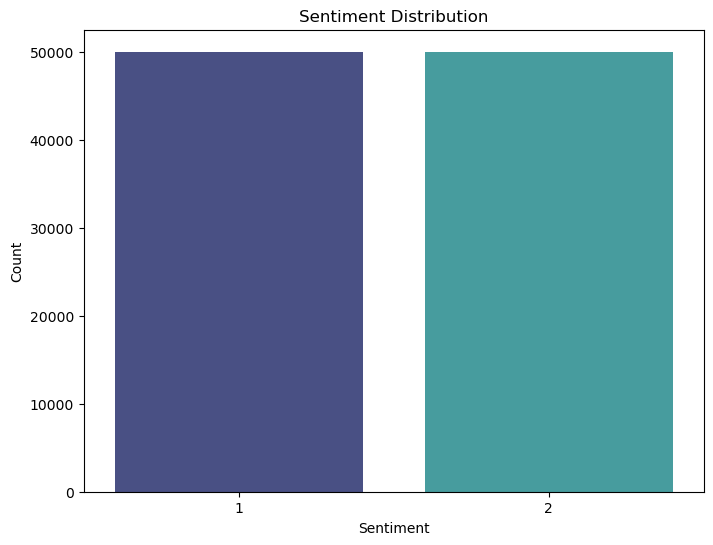

In [11]:
# Explore sentiment distribution
sentiment_counts = review_df['Sentiments'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="mako")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [12]:
pos_sentiment = review_df[review_df['Sentiments']==2]
pos_sentiment['Reviews']

2        Excellent imagery...dumbed down story I enjoye...
8        This import is sooooooooooo good This is a gre...
10       Amazing, Fascinating This was a stunning book....
13       Great Album - some serious stuff First off, I'...
14       good quality, but high shipping charge the scr...
                               ...                        
99989    Definatley worth it! I love this can opener! I...
99991    EXCELLENT POP. I can't believe more people don...
99992    Great Song Going back to the song Ventura High...
99993    excellent reading I'm fairly interested in eth...
99997    Son loves these! I buy these for my 8 yr. old ...
Name: Reviews, Length: 49987, dtype: object

In [13]:
neg_sentiment = review_df[review_df['Sentiments']==1]
neg_sentiment['Reviews']

0        Expensive Junk This product consists of a piec...
1        Toast too dark Even on the lowest setting, the...
3        Are we pretending everyone is married? The aut...
4        Not worth your time Might as well just use a k...
5        Book reads like written for grade schoolers I ...
                               ...                        
99994    Overly simplified and not helpful I purchased ...
99995    A Good Intro book but not a GREAT one! Well, I...
99996    Not pleased. The Firm Lower body sculpt DVD di...
99998    Terribad Firstly I have a 2009 Dodge Dakota, s...
99999    Sized wrong I ordered two Kid's Long Sleeve Ro...
Name: Reviews, Length: 50013, dtype: object

In [14]:
# let's visualize reviews with positive sentiments and negative using word cloud
from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)



{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

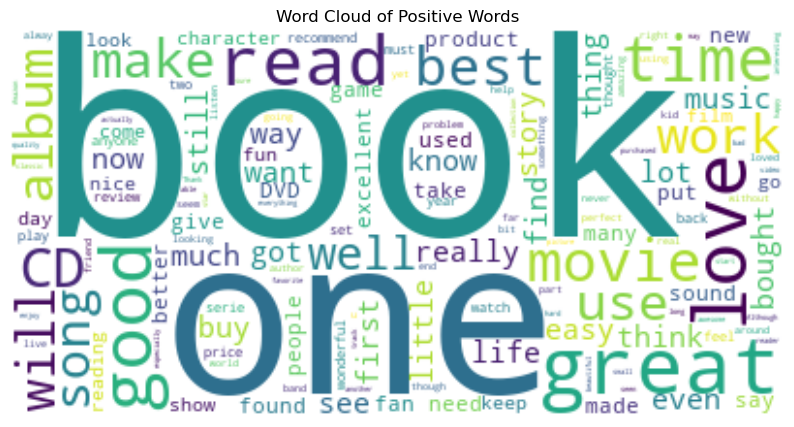

In [15]:
# positive sentiment sentence
pos_sentiment_sentence = " ".join(pos_sentiment['Reviews'])

# Word cloud visualization
wordcloud = WordCloud(max_words = 200, stopwords= set(STOPWORDS), background_color="white").generate(pos_sentiment_sentence)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of Positive Words")
plt.show()

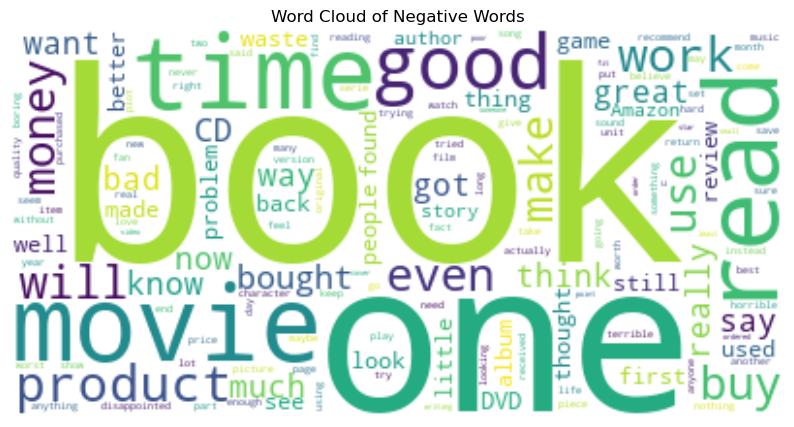

In [16]:
# negative sentiment sentence
neg_sentiment_sentence = " ".join(neg_sentiment['Reviews'])

# Word cloud visualization
wordcloud = WordCloud(max_words = 200, stopwords= set(STOPWORDS), background_color="white").generate(neg_sentiment_sentence)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of Negative Words")
plt.show()

In [17]:
# let's get the length of messages
review_df['length'] = review_df['Reviews'].apply(len)
review_df['length']

0        622
1        206
2        409
3        381
4        123
        ... 
99995    425
99996    706
99997    498
99998    541
99999    383
Name: length, Length: 100000, dtype: int64

<Axes: ylabel='Frequency'>

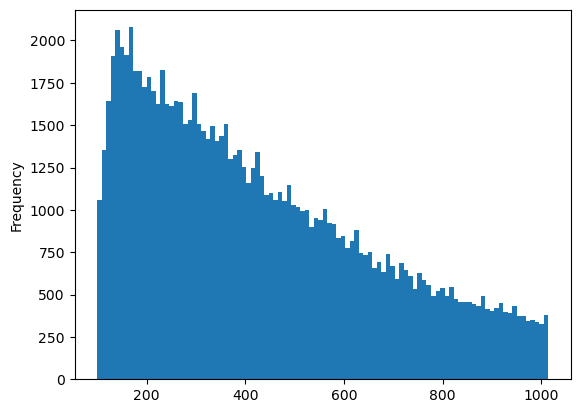

In [18]:
# visualize the length in histogram
review_df['length'].plot(bins = 100, kind = 'hist')

In [19]:
# let's see the longest message
review_df[review_df['length'] == review_df['length'].max()]['Reviews'].iloc[0]

'Not one of his best Masterton has written a *lot* of books, of which I\'ve read a few. Of those, I\'d have to place this one somewhere in the middle.It starts out great, builds on some interesting ideas about the flexibility of time, if you use the right kind of architecture, and keeps your attention and continues to be creepy for about 3/4 of the way. Then it seems like Masterton gets lazy and relies on some horror cliches that will make anyone who has seen a few horror films groan. One of the characters even thinks to himself that the situation he\'s in is like the film "Don\'t Look Now". The characters do things like walk around a spooky house separately when they know it\'s dangerous. That\'s like a joke out of the first "Scream" movie! And there are scenes that will remind readers too much of "The Shining".Because this book started out so well, I can rate it higher than Masterton\'s "Basilisk", but it comes nowhere near the level of "The Hell Candidate" and "House of Bones", both

### Task 2: Text Analysis of Reviews

In [20]:
# Data cleaning
# Drop the length column

review_df = review_df.drop(columns=['length'])

In [21]:
# importing libraries need for text cleaning and analysis
import string
string.punctuation  # to remove all punctions in the data set

import nltk         # natural language tool kits
nltk.download('stopwords')
from nltk.corpus import stopwords    # to remove stopwords not needed
stopwords = set(stopwords.words('english')) # Initialize stopwords set

from nltk.probability import FreqDist  # to show the frequency distribution of the words
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olayi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Let's define a pipeline to clean up all the reviews
# The pipeline performs the following process: (1) remove punctuation, (2) remove stopwords

def review_cleaning(review):
    punc_removal = [char for char in review if char not in string.punctuation]  # removing punctions in the each review and it returns list of each word
    
    review_join = "".join(punc_removal)   # Join all reviews into a single string
    
    review_words = review_join.split()     # Split the string into individual words
    
    cleaned_review = [word for word in review_words if word.lower() not in stopwords]  # Remove stopwords
    
    return cleaned_review
    

In [23]:
# let's apply the cleaning pipeline to our Reviews column in our dataframe

review_df_cleaned = review_df['Reviews'].apply(review_cleaning)
review_df_cleaned[0]

['Expensive',
 'Junk',
 'product',
 'consists',
 'piece',
 'thin',
 'flexible',
 'insulating',
 'material',
 'adhesive',
 'backed',
 'velcro',
 'white',
 'electrical',
 'tapeProblems1',
 'Instructions',
 'three',
 'pictures',
 'little',
 'information2',
 'Velcro',
 'crumpled',
 'received',
 'stronger',
 'adhesive',
 'tried',
 'disengage',
 'velcro',
 'pieces',
 'came',
 'paint',
 'ceiling3',
 'White',
 'electrical',
 'tape',
 'horrible',
 'cheap',
 'narrow',
 'fell',
 'less',
 '1',
 'hour4',
 'price',
 'ripoffI',
 'building',
 'easier',
 'use',
 'cheaper',
 'attractive',
 'higher',
 'rvalue',
 'surprised',
 'Amazon',
 'even',
 'lists',
 'junk']

In [24]:
# Frequency distribution of the most common words
# Flatten the list of lists
review_df_flat = [word for sublist in review_df_cleaned for word in sublist]


fdist = FreqDist(review_df_flat)
top_words = fdist.most_common(20)
print("Top 20 most common words:", top_words)



Top 20 most common words: [('book', 50808), ('one', 33033), ('like', 26569), ('good', 23992), ('would', 22364), ('great', 21643), ('get', 17882), ('read', 17819), ('time', 16945), ('movie', 15278), ('really', 14921), ('much', 13079), ('dont', 12945), ('first', 12248), ('well', 12184), ('even', 12150), ('product', 11084), ('use', 10857), ('better', 10507), ('work', 10481)]


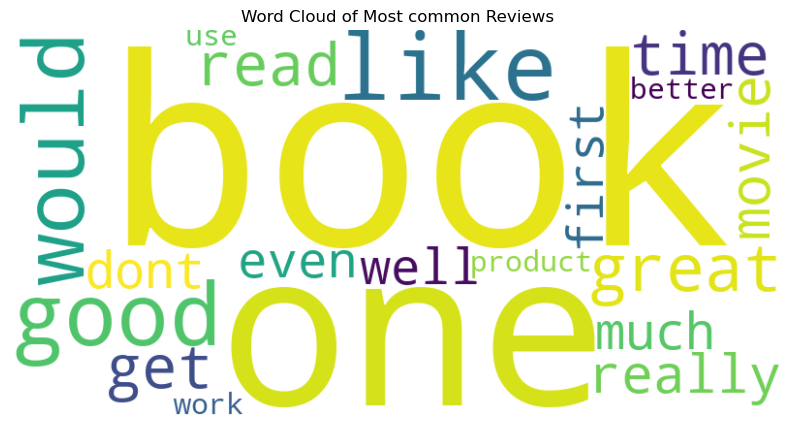

In [25]:
# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(top_words))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of Most common Reviews")
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
review_cleaned = [' '.join(review) for review in review_df_cleaned]

# Define the cleaning pipeline we defined earlier
cv = CountVectorizer(max_features= 1500)
reviews_countvectorizer = cv.fit_transform(review_cleaned)

In [27]:
reviews_countvectorizer.shape

(100000, 1500)

In [28]:
print(cv.get_feature_names_out())

['10' '100' '11' ... 'youre' 'youve' 'zero']


In [29]:
# let's drop the review column in the review_df 
review_df.drop(['Reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [30]:
# Now let's concatenate them together
review_df = pd.concat([review_df, reviews], axis=1)


### Task 3: Predictive Modelling for Sentiment Classification


In [31]:
# Let's define our features (X) and target (y) variable
X = review_df.drop(['Sentiments'],axis=1)
y = review_df['Sentiments']

In [32]:
# perform a label encoder for the y variable to make it 0 and 1

from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target (y) variable
y = label_encoder.fit_transform(y)

In [33]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.20, random_state = 0)

#### Using Naive Bayes Classifier Model

In [34]:
# Build and fit the naive bayes model on the training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

Train Data Accuracy: 84.21125


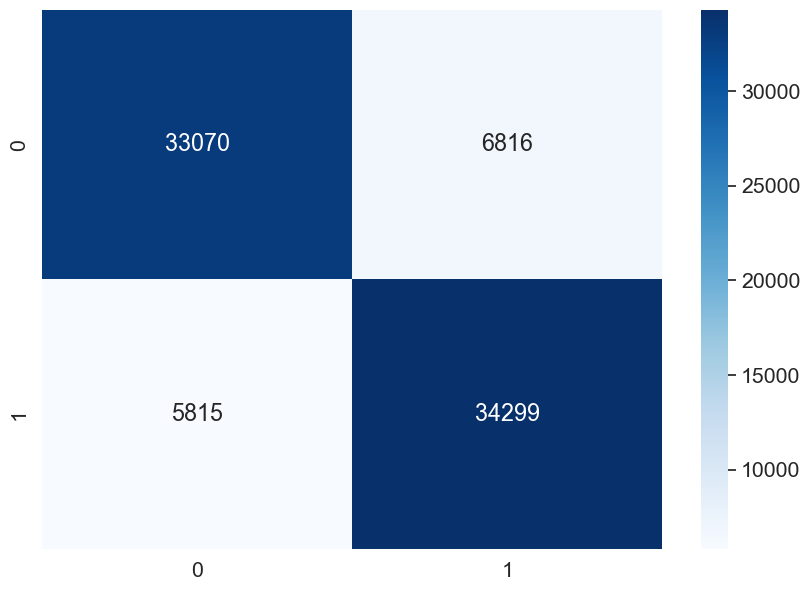

In [35]:
# Predicting using our model using the training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_train = classifier.predict(X_train)

# confusion_matrix visualization
cm = confusion_matrix(y_train, y_pred_train)
df_cm = pd.DataFrame(cm, index =(0,1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt='g', cmap='Blues')
print("Train Data Accuracy:", accuracy_score(y_train, y_pred_train) * 100)

Test Data Accuracy: 83.515


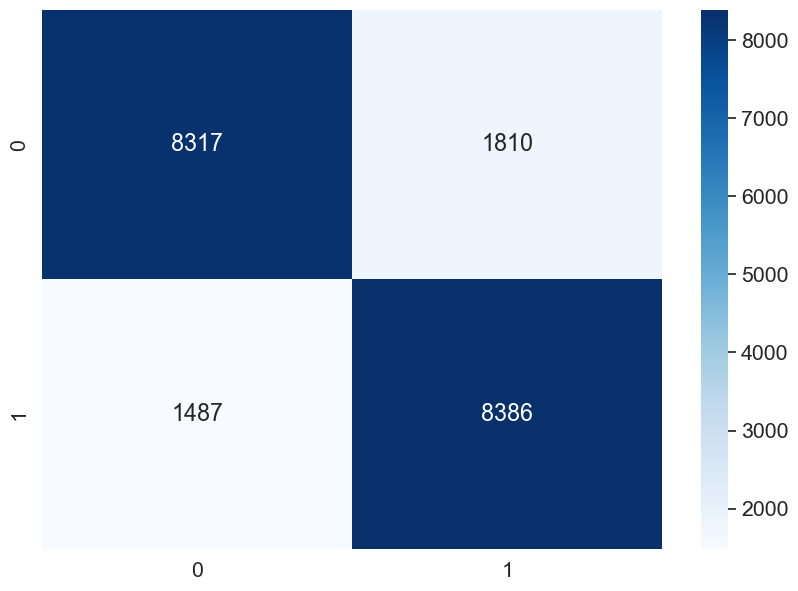

In [36]:
# evaluating our model using the test dataset
y_pred_test = classifier.predict(X_test)

# confusion_matrix visualization
cm = confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(cm, index =(0,1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt='g', cmap='Blues')
print("Test Data Accuracy:", accuracy_score(y_test, y_pred_test)*100)

In [37]:
# Comparing the F1 score, Precision and Recall from the classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     10127
           1       0.82      0.85      0.84      9873

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



Precision: For class 0 (negative), 85% of the instances predicted as negative were actually negative, and for class 1 (positive), 82% of the instances predicted as positive were actually positive.

Recall: For class 0, 81% of the actual negative instances were correctly classified, and for class 1, 85% of the actual positive instances were correctly classified.

F1-score: Harmonic mean of precision and recall, providing a balance between them. It is 83% for class 0 and 83% for class 1.

#### Using Logistic Regression Classifier Model

In [38]:
# Build and fit the naive bayes model on the training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

Train Data Accuracy: 87.58375000000001


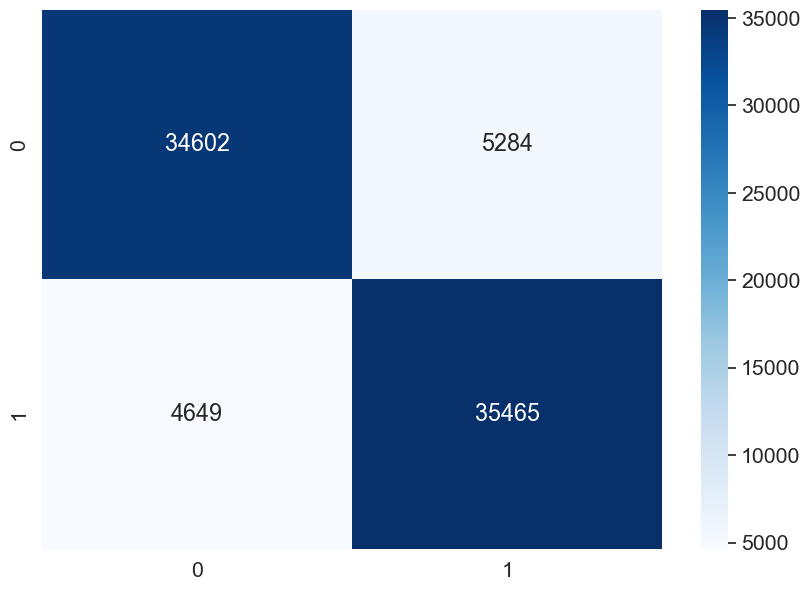

In [39]:
# Predicting using our model using the training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_train = classifier_lr.predict(X_train)

# confusion_matrix visualization
cm = confusion_matrix(y_train, y_pred_train)
df_cm = pd.DataFrame(cm, index =(0,1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt='g', cmap='Blues')
print("Train Data Accuracy:", accuracy_score(y_train, y_pred_train)*100)

Test Data Accuracy: 86.14


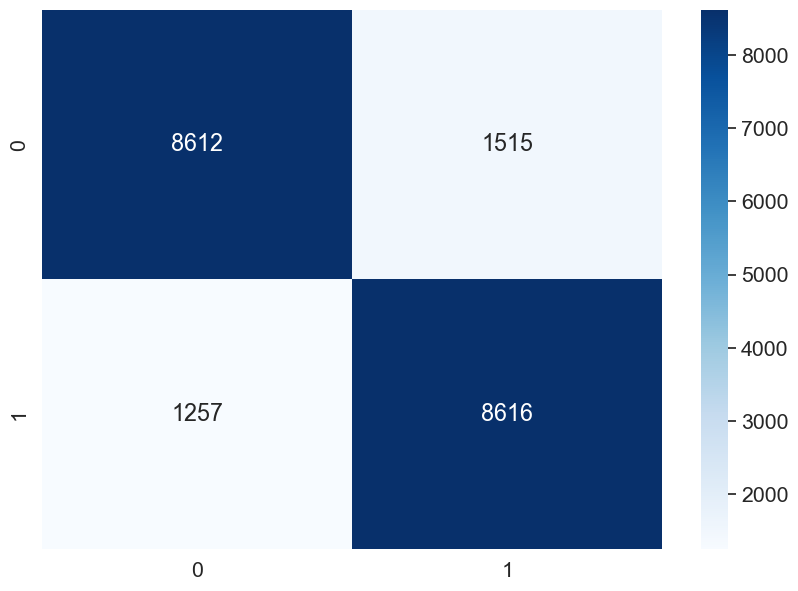

In [40]:
# evaluating our model using the test dataset
y_pred_test = classifier_lr.predict(X_test)

# confusion_matrix visualization
cm = confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(cm, index =(0,1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt='g', cmap='Blues')
print("Test Data Accuracy:", accuracy_score(y_test, y_pred_test)*100)

In [41]:
# Comparing the F1 score, Precision and Recall from the classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     10127
           1       0.85      0.87      0.86      9873

    accuracy                           0.86     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.86      0.86      0.86     20000



Precision: For class 0 (negative), 87% of the instances predicted as negative were actually negative, and for class 1 (positive), 85% of the instances predicted as positive were actually positive.

Recall: For class 0, 85% of the actual negative instances were correctly classified, and for class 1, 87% of the actual positive instances were correctly classified.

F1-score: Harmonic mean of precision and recall, providing a balance between them. It is 86% for class 0 and 86% for class 1.

#### Comparing Both Models
Both models have high accuracy, with Logistic Regression having a slightly higher accuracy than Naive Bayes.
Precision, Recall, and F1-score for both classes are relatively balanced in both models, indicating good performance in terms of correctly identifying instances of both classes.
For the Naive Bayes model, there is a slight imbalance in precision and recall for Class 0 and Class 1, whereas the Logistic Regression model shows more balanced performance across both classes.

Conclusion:
While both models perform well, the Logistic Regression model, with its slightly higher accuracy and more balanced precision-recall trade-offs, appears to be the better-performing model.

#### Evaluating the Logistic Regression model Using a new data from Test Dataset in the Achive Folder


In [42]:
# Import test datset and repeat the process just like the training data
newdata_df = pd.read_csv(r"C:\Users\olayi\Downloads\Projects\Amazon_review. Assessment\archive (1)\test.csv", header=None)

# Concatenate columns 1 and 2 into a single column
newdata_df["Review"] = newdata_df[1] + " " + newdata_df[2]

# Drop columns 1 and 2
newdata_df.drop(columns=[1, 2], inplace=True)

# rename columns
newdata_df.columns = ['Sentiments', 'Reviews']
newdata_df

,Sentiments,Reviews
0,2,Great CD My lovely Pat has one of the GREAT vo...
1,2,One of the best game music soundtracks - for a...
2,1,Batteries died within a year ... I bought this...
3,2,"works fine, but Maha Energy is better Check ou..."
4,2,Great for the non-audiophile Reviewed quite a ...
...,...,...
399995,1,Unbelievable- In a Bad Way We bought this Thom...
399996,1,"Almost Great, Until it Broke... My son recieve..."
399997,1,Disappointed !!! I bought this toy for my son ...
399998,2,Classic Jessica Mitford This is a compilation ...


In [43]:
newdata_df.shape

(400000, 2)

In [44]:
# I had to create a sample of the whole test data set of run time and memory capacity
# Sample 50,000 rows randomly from the dataset
newdata_df = newdata_df.sample(frac=0.2, random_state=42)

# to reset the index of the sampled DataFrame
newdata_df.reset_index(drop=True, inplace=True)

In [45]:
newdata_df.shape

(80000, 2)

In [46]:
# Drop missing values
newdata_df = newdata_df.dropna()

In [47]:
# Preprocess the test data using the review_cleaning pipeline using on the training set
newdata_review_cleaned = review_cleaning(newdata_df['Reviews'])
newdata_review_cleaned  = [' '.join(newdata_review_cleaned)]



In [48]:
# Define the cleaning pipeline we defined earlier
test_countvectorizer = cv.transform(newdata_df['Reviews']).toarray()

In [49]:
test_countvectorizer.shape

(79998, 1500)

In [50]:
# let's drop the review column in the test_df 
newdata_df.drop(['Reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(test_countvectorizer)

In [51]:
# Now let's concatenate them together
newdata_df = pd.concat([newdata_df, reviews], axis=1)

In [52]:
newdata_df.shape

(80000, 1501)

In [53]:
# drop missing values if there is
newdata_df = newdata_df.dropna()

In [54]:
# Let's define our features (X) and target (y) variable
X_new_test = newdata_df.drop(['Sentiments'],axis=1)
y_new_test = newdata_df['Sentiments']


# label encode the y_test just like the training set
y_new_test = label_encoder.transform(y_new_test)

# Make predictions on the test data using the trained classifier
y_pred = classifier_lr.predict(X_new_test )

Test Data Accuracy: 0.5612155607780389


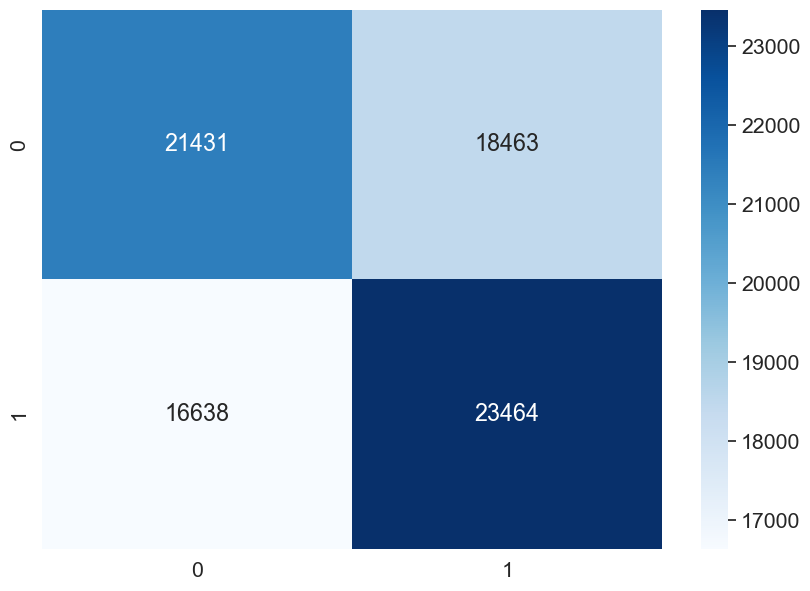

In [55]:
# Evaluating our model using the test dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# confusion_matrix visualization
cm = confusion_matrix(y_new_test, y_pred)
df_cm = pd.DataFrame(cm, index =(0,1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt='g', cmap='Blues')
print("Test Data Accuracy:", accuracy_score(y_new_test, y_pred))

In [56]:
# Comparing the F1 score, Precision and Recall from the classification report
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55     39894
           1       0.56      0.59      0.57     40102

    accuracy                           0.56     79996
   macro avg       0.56      0.56      0.56     79996
weighted avg       0.56      0.56      0.56     79996



Precision: For class 0 (negative), 56% of the instances predicted as negative were actually negative, and for class 1 (positive), 56% of the instances predicted as positive were actually positive.

Recall: For class 0, 54% of the actual negative instances were correctly classified, and for class 1, 59% of the actual positive instances were correctly classified.

F1-score: Harmonic mean of precision and recall, providing a balance between them. It is 55% for class 0 and 57% for class 1.
    
#### Conclusion
The Logistic Regression classifier applied to new data achieved an accuracy of 56%. It shows balanced precision, recall, and F1-score for both classes (0 and 1), with values around 0.56. The model performs equally well in identifying positive and negative instances, resulting in an overall balanced evaluation across various metrics.

#### Using Artificial Neural Network Model

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [61]:
# Reshaping the target inputs
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Network parameter
output_size = 1
Batch_size = 128
hidden_units = 256
dropout = 0.45

# Defining the model
model = Sequential()
model.add(Dense(hidden_units, activation = 'relu')) # First hidden layer
model.add(Dropout(dropout))
model.add(Dense(hidden_units, activation = 'relu')) # Second hidden layer
model.add(Dropout(dropout))
model.add(Dense(output_size, activation = 'sigmoid')) # Output layer

# choosing the optimizer, loss function and metric
# compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])


In [63]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=20)

# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath="nlp_classifier-weights.hdf5", verbose=2, save_best_only=True)

# set the epochs
# epochs that we will train for (assuming early stopping doesn't kick in)
epochs = 50

In [64]:
#Train the model
model.fit(X_train, # train inputs
          y_train, # train targets
          batch_size = Batch_size, 
          epochs = epochs, 
          callbacks=[checkpointer, earlystopping], 
          validation_data=(X_test, y_test),       
          verbose = 2          # making sure we get enough information about the training process
          )

Epoch 1/50



Epoch 1: val_loss improved from inf to 0.32289, saving model to nlp_classifier-weights.hdf5
625/625 - 13s - loss: 0.3653 - accuracy: 0.8399 - val_loss: 0.3229 - val_accuracy: 0.8607 - 13s/epoch - 20ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.32289 to 0.31612, saving model to nlp_classifier-weights.hdf5
625/625 - 7s - loss: 0.2906 - accuracy: 0.8767 - val_loss: 0.3161 - val_accuracy: 0.8647 - 7s/epoch - 11ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.31612
625/625 - 7s - loss: 0.2504 - accuracy: 0.8971 - val_loss: 0.3190 - val_accuracy: 0.8674 - 7s/epoch - 12ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.31612
625/625 - 7s - loss: 0.2042 - accuracy: 0.9170 - val_loss: 0.3384 - val_accuracy: 0.8642 - 7s/epoch - 12ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.31612
625/625 - 7s - loss: 0.1629 - accuracy: 0.9358 - val_loss: 0.3701 - val_accuracy: 0.8622 - 7s/epoch - 12ms/step
Epoch 6/50

Epoch 6: val_loss did not improve f

In [65]:
# save the model architecture to json file for future use

model_json = model.to_json()
with open("nlp_classifier-model.json","w") as json_file:
  json_file.write(model_json)

#### Assess Traineed ANN Model Performance

In [66]:
# Load pretrained model (instead of training the model for 1+ hours) 
with open('nlp_classifier-model.json', 'r') as json_file:
    json_savedModel= json_file.read()
# load the model  
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('nlp_classifier-weights.hdf5')
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [72]:

# Validate the model on a new data
test_loss, test_accuracy = model.evaluate(X_new_test,y_new_test, verbose =2, batch_size = Batch_size )

# Print result
print('\n New Data Accuracy: %.1f%%' %(100*test_accuracy))

625/625 - 4s - loss: 0.0000e+00 - accuracy: 0.5623 - 4s/epoch - 6ms/step

 New Data Accuracy: 56.2%


The Artificial Neural Newtork Model has a 56% accuracy on the new data, which is nearly equivalent to the accuracy obtained by the Logistic Regression Model.

In [73]:
# make prediction
test_predict = model.predict(X_new_test,verbose =2, batch_size = Batch_size )

625/625 - 5s - 5s/epoch - 7ms/step


In [74]:
test_predict.shape

(79996, 1)

In [75]:
test_predict

array([[9.7322613e-01],
       [1.4579388e-04],
       [8.1489688e-01],
       ...,
       [2.4228665e-04],
       [1.0776355e-01],
       [9.3584114e-01]], dtype=float32)

In [76]:
# Obtain the predicted class from the model prediction
predict = []

for i in test_predict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)
predict

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U1')